<a href="https://colab.research.google.com/github/IamArmanNikkhah/DataMining-Absenteeism_at_Work/blob/main/DataMining_Ex3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Packages**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.decomposition import PCA
import math

**Cloning required files**

In [ ]:
!git clone https://github.com/IamArmanNikkhah/DataMining-Preprocess-Absenteeism_at_Work.git

fatal: destination path 'DataMining-Preprocess-Absenteeism_at_Work' already exists and is not an empty directory.


**Load CSV file**

In [ ]:
df = pd.read_csv('/content/DataMining-Preprocess-Absenteeism_at_Work/Absenteeism_at_work.csv')

# Data Pre-processing

**Finding empty cells  in each row**

In [ ]:
def empty_cells(df):
    """
    Returns a list of columns with empty cells and the number of them
    """
    empty_cells = []
    for col in df.columns:
        if df[col].isnull().sum() > 0:
            empty_cells.append((col, df[col].isnull().sum()))
    return empty_cells

empty_cells(df)

[('Reason for absence', 3),
 ('Month of absence', 1),
 ('Transportation expense', 7),
 ('Distance from Residence to Work', 3),
 ('Service time', 3),
 ('Age', 3),
 ('Work load Average/day', 10),
 ('Hit target', 6),
 ('Disciplinary failure', 6),
 ('Education', 10),
 ('Son', 6),
 ('Social drinker', 3),
 ('Social smoker', 4),
 ('Pet', 2),
 ('Weight', 1),
 ('Height', 14),
 ('Body mass index', 31),
 ('Absenteeism time in hours', 22)]

**Remove rows that have empty cells in "Absenteeism time in hours" column**

In [ ]:
def drop_empty_rows(df, column):
    return df.dropna(subset=[column])
df = drop_empty_rows(df, 'Absenteeism time in hours')

**Calculating null BMI values (if applicable)**


In [ ]:
# find empty cells in the BMI column
empty_cell = df['Body mass index'].isnull()

# calculate BMI according to Weight and Height columns if applicable
df.loc[empty_cell, 'Body mass index'] = df.loc[empty_cell, 'Weight'] / (df.loc[empty_cell, 'Height']/100)**2

# check if there are still empty cells in the BMI column
df['Body mass index'].isnull().sum()


2

In [ ]:
df[df['Body mass index'].isnull()]

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
272,11,19.0,9.0,4,1,289.0,36.0,13.0,33.0,"294,217",...,0.0,1.0,2.0,1.0,NaN,1.0,90.0,NaN,NaN,24.0
273,5,0.0,9.0,5,1,235.0,20.0,13.0,43.0,"294,217",...,1.0,1.0,1.0,1.0,0.0,0.0,106.0,NaN,NaN,0.0


**Delete rows that their BMI can't be calculated**


In [ ]:
df = df.dropna(subset=['Body mass index'])

**Finding a list of columns that are highly correlated to each other.**

In [ ]:
def highly_correlated(df, threshold=0.8):
    """
    Returns a list of columns that are highly correlated to each other.
    """
    corr_matrix = df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    return to_drop

highly_correlated(df, 0.8)

['Body mass index']

According to the correlation matrix Weight and BMI are highly coorelated so we can ommit Weight column

In [ ]:
df.drop('Weight', axis=1, inplace=True)

**converting 'Work load Average/day' data cells from string to integer**

In [ ]:
def convert_to_int(df, column_name):
    df[column_name] = df[column_name].apply(lambda x: float(str(x).replace(',', '')))
    return df
df = convert_to_int(df, 'Work load Average/day')

**Filling empty cells in "Transportation expense" , "Distance from Residence to Work", "Service time", "Age", "Work load Average/day", "HIT target", "Son", "Pet" , "Weight" with mean**

In [ ]:
empty_cells(df)

[('Reason for absence', 3),
 ('Month of absence', 1),
 ('Transportation expense', 6),
 ('Distance from Residence to Work', 3),
 ('Service time', 3),
 ('Age', 2),
 ('Work load Average/day', 8),
 ('Hit target', 6),
 ('Disciplinary failure', 5),
 ('Education', 10),
 ('Son', 6),
 ('Social drinker', 3),
 ('Social smoker', 3),
 ('Pet', 2),
 ('Height', 12)]

In [ ]:
def fillna_mean(df, column_name):
    """
    Get a column from a dataframe and fill empty rows with the average of that column
    """
    column = df[column_name]
    df[column_name] = column.fillna(column.mean())
    return df

def fill_null_with_normal_distribution(df, column_name):
    """
    Fill null cells in a column with normal distribution
    """
    mean = df[column_name].mean()
    std = df[column_name].std()
    null_count = df[column_name].isnull().sum()
    random_list = np.random.randn(null_count)
    random_list = random_list * std + mean
    random_list = random_list.round().astype(int)
    df.loc[df[column_name].isnull(), column_name] = random_list
    return df

df = fill_null_with_normal_distribution(df, 'Reason for absence')
df = fill_null_with_normal_distribution(df, 'Month of absence')
df = fill_null_with_normal_distribution(df, 'Transportation expense')
df = fill_null_with_normal_distribution(df, 'Distance from Residence to Work')
df = fill_null_with_normal_distribution(df, 'Service time')
df = fill_null_with_normal_distribution(df, 'Age')
df = fillna_mean(df, 'Work load Average/day')
df = fill_null_with_normal_distribution(df, 'Hit target')
df = fill_null_with_normal_distribution(df, 'Disciplinary failure')
df = fill_null_with_normal_distribution(df, 'Education')
df = fill_null_with_normal_distribution(df, 'Son')
df = fill_null_with_normal_distribution(df, 'Social drinker')
df = fill_null_with_normal_distribution(df, 'Social smoker')
df = fill_null_with_normal_distribution(df, 'Pet')
df = fill_null_with_normal_distribution(df, 'Height')

**Finding outliners and noises in data and removing them**

In [ ]:
def find_outliners(df, col):
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)
    return df[(df[col] < lower_bound) | (df[col] > upper_bound)]

Absenteeism_outliners   = find_outliners(df, 'Absenteeism time in hours')
df.drop(Absenteeism_outliners.index.tolist(),  inplace=True)

load_outliners          = find_outliners(df, 'Work load Average/day')
df.drop(load_outliners.index.tolist(),         inplace=True)

Service_outliners       = find_outliners(df, 'Service time')
df.drop(Service_outliners.index.tolist(),      inplace=True)

Age_outliners           = find_outliners(df, 'Age')
df.drop(Age_outliners.index.tolist(),          inplace=True)

Transportation_outliners= find_outliners(df, 'Transportation expense')
df.drop(Transportation_outliners.index.tolist(),  inplace=True)

Distance_outliners= find_outliners(df, 'Distance from Residence to Work')
df.drop(Distance_outliners.index.tolist(),  inplace=True)

Hit_outliners= find_outliners(df, 'Hit target')
df.drop(Hit_outliners.index.tolist(),  inplace=True)

Son_outliners= find_outliners(df, 'Son')
df.drop(Son_outliners.index.tolist(),  inplace=True)

Height_outliners= find_outliners(df, 'Height')
df.drop(Height_outliners.index.tolist(),  inplace=True)

**Removing least coorelated columns with the 'Absenteeism time in hours' column**

In [ ]:
def least_correlated(df, col):
    corr_matrix = df.corr().abs()
    corr_col = corr_matrix[col].sort_values(ascending=True)
    return corr_col[:5]

least_correlated(df, 'Absenteeism time in hours')

Distance from Residence to Work    0.001617
Hit target                         0.002684
Month of absence                   0.005462
Education                          0.006679
Service time                       0.010298
Name: Absenteeism time in hours, dtype: float64

Least coorelated columns have really low coorelation with the target, so we can remove them

In [ ]:
def remove_columns(df, col_list):
    df.drop(col_list, axis=1, inplace=True)
    return df

not_coorelated_columns =  least_correlated(df, 'Absenteeism time in hours').axes[0]
not_coorelated_columns =  [not_coorelated_columns[i] for i in range(4)]
df                     =  remove_columns(df, not_coorelated_columns)

**Spliting Dataset into Training set ( = X) and Test set ( = Y)**

In [ ]:
X = df.iloc[:,:-1]
Y = df.iloc[:,-1]

**Normalizing numerical columns**

In [ ]:
def normalize_columns(df, columns):
    """
    Normalize specific columns in a dataframe
    """
    for column in columns :
        if column in df.columns.values.tolist():
          df[column] = (df[column] - df[column].mean()) / df[column].std()
    return df

X = normalize_columns(X, ["Transportation expense",  "Age", "Distance from Residence to Work" ,"Work load Average/day", "Son", "Height", "Body mass index"])

**discretizing Data in Y into 10 categories**

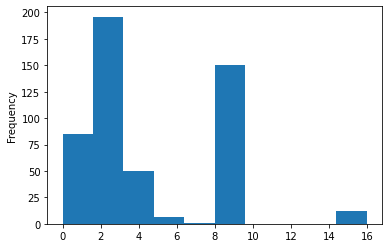

In [ ]:
df['Absenteeism time in hours'].plot(kind='hist')

# Display the plot
plt.show()

In [ ]:
df['Absenteeism time in hours'] = df['Absenteeism time in hours'].apply(lambda x: 0 if x <= 8  else x)
df['Absenteeism time in hours'] = df['Absenteeism time in hours'].apply(lambda x: 1 if 8 < x else x)

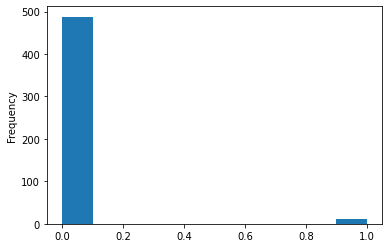

In [ ]:
df['Absenteeism time in hours'].plot(kind='hist')

# Display the plot
plt.show()

**Resolving the data unbalancity using SMOTE**

In [ ]:
!pip install imbalanced-learn

In [ ]:
import imblearn
import random
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler 
from collections import Counter

Number of each category

In [ ]:
print('Original dataset shape %s' % Counter(Y))

Original dataset shape Counter({0.0: 488, 1.0: 12})


In [ ]:
ros    = RandomOverSampler(random_state=42)
X, Y   = ros.fit_resample(X, Y)

In [ ]:
print('Resampled dataset shape %s' % Counter(Y))

Resampled dataset shape Counter({0.0: 488, 1.0: 488})


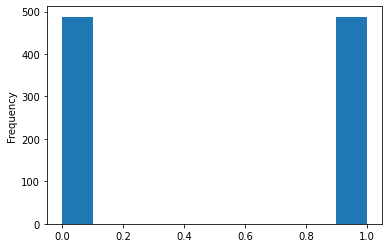

In [ ]:
Y.plot(kind='hist')

# Display the plot
plt.show()

**split dataframe into train set and test set randomly**

In [ ]:
def split_train_test(data, test_ratio):
    shuffled_indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled_indices[:test_set_size]
    train_indices = shuffled_indices[test_set_size:]
    return train_indices, test_indices

dataset = pd.concat([X, Y], axis=1)
train_indices , test_indices = split_train_test(dataset, 0.2)

X_train                      = X.iloc[train_indices]
Y_train                      = Y.iloc[train_indices]

X_test                       = X.iloc[test_indices]
Y_test                       = Y.iloc[test_indices]

df_train                     = dataset.iloc[train_indices]
df_test                      = dataset.iloc[test_indices]

# Implementing K-NN alghorithm

**1 - The first step is to calculate the distance between two rows in a dataset.**

In [ ]:
"""
Euclidean distance between two vectors
"""

def euclidean_distance(x, y):
    x , y  = np.array(x), np.array(y)
    return np.sqrt(np.sum((x - y) ** 2))

"""
Manhattan distance between two vectors
"""
def manhattan_distance(x, y):
    x , y  = np.array(x), np.array(y)
    return np.sum(np.abs(x - y))

"""
Chebyshev distance between two vectors
"""
def chebyshev_distance(x, y):
    x , y  = np.array(x), np.array(y)
    return np.max(np.abs(x - y))

"""
Minkowski distance between two vectors
"""
def minkowski_distance(x, y, p=3):
    x , y  = np.array(x), np.array(y)
    return np.sum(np.abs(x - y) ** p) ** (1 / p)

**2 - Get Nearest Neighbors**

In [ ]:
def df_to_list(df):
    """
    Convert a dataframe to a list
    """
    return df.values.tolist()

In [ ]:
def get_neighbors(train, test_row, num_neighbors, distance_function):
    distances = list()
    row_indx  = 0
    train, test_row  = df_to_list(train), df_to_list(test_row)
    for train_row in train:
        dist = distance_function(test_row, train_row)
        distances.append((train_row, row_indx , dist))
        row_indx += 1
    distances.sort(key=lambda tup: tup[2])
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append((distances[i][0], distances[i][1]))
    return neighbors

**3 - Make Predictions**

In [ ]:
def predict_classification(X, Y , X_row, num_neighbors, distance_function):
    Y             = df_to_list(Y)
    neighbors     = get_neighbors(X, X_row, num_neighbors, distance_function)
    output_values = [Y[row[1]] for row in neighbors]
    prediction    = max(set(output_values), key=output_values.count)
    return prediction

In [ ]:
def k_nearest_neighbors(X, Y, X_test, num_neighbors, distance_function=euclidean_distance):
	predictions = list()
	#X_test = df_to_list(X_test)
	for indx in range(len(X_test.index)):
		row = X_test.iloc[indx]
		output = predict_classification(X, Y, row, num_neighbors, distance_function)
		predictions.append(output)
	
  
	return(predictions)

In [ ]:
from sklearn import metrics
import seaborn as sns

def plot_confusion_matrix(actual, predicted):
  cf_matrix = metrics.confusion_matrix(actual, predicted)
  ax = sns.heatmap(cf_matrix, annot=True, cmap='Blues')
  ax.set_title('Confusion Matrix with labels\n\n');
  ax.set_xlabel('\nPredicted Category')
  ax.set_ylabel('Actual Category ');
  plt.show()
  
def accuracy_metric(actual, predicted):
    correct = 0
    for i in range(len(actual)):
        if actual[i] == predicted[i]:
            correct += 1
    return correct / float(len(actual)) * 100.0

The confusion_matrix is :



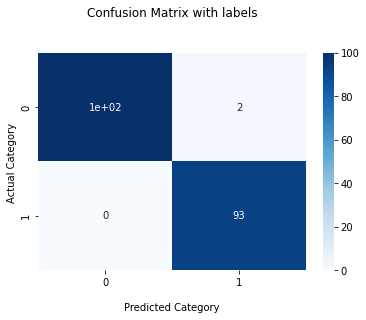

----------------------------------

the accuracy of the model is: 98.97435897435898 



In [ ]:
predicted = k_nearest_neighbors(X_train, Y_train, X_test, 2)
actual    = Y_test.values.tolist()
accuracy  = accuracy_metric(actual, predicted)
print("The confusion_matrix is :\n")
plot_confusion_matrix(actual, predicted)
print("----------------------------------\n")
print(f"the accuracy of the model is: {accuracy} \n")

**Finding the optimal value of K by plotting for diffrent Ks**

In [ ]:
def accuracy_respect_K(k):
  predicted = k_nearest_neighbors(X_train, Y_train, X_test, k)
  actual    = Y_test.values.tolist()
  return accuracy_metric(actual, predicted)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_function(f, xmin, xmax):
    """
    Plot a function f(x) from xmin to xmax with npoints points
    """
    x = np.arange(xmin, xmax + 1)
    y = [f(xi) for xi in x]
    plt.plot(x, y)
    plt.show()

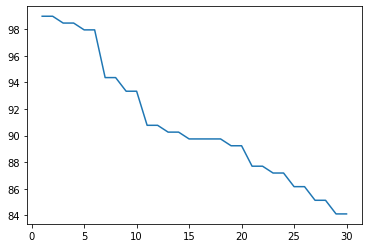

In [ ]:
plot_function(accuracy_respect_K, 1, 30)

**Classification using scikit-learn KNN**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

range_k = range(1,30)
scores = {}
scores_list = []
for k in range_k:
   classifier = KNeighborsClassifier(n_neighbors=k)
   classifier.fit(X_train, Y_train)
   y_pred = classifier.predict(X_test)
   scores[k] = metrics.accuracy_score(Y_test,y_pred)
   scores_list.append(metrics.accuracy_score(Y_test,y_pred))
result = metrics.confusion_matrix(Y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = metrics.classification_report(Y_test, y_pred)
print("Classification Report:",)
print (result1)

Confusion Matrix:
[[71 31]
 [ 0 93]]
Classification Report:
              precision    recall  f1-score   support

         0.0       1.00      0.70      0.82       102
         1.0       0.75      1.00      0.86        93

    accuracy                           0.84       195
   macro avg       0.88      0.85      0.84       195
weighted avg       0.88      0.84      0.84       195



**Finding the optimal number of neighbors in the K-NN alghorithm using K-fold cross validation**

In [ ]:
from sklearn.model_selection import cross_val_score
def find_optimal_k(X, y, k_fold):
    k_range = range(1, 31)
    k_scores = []
    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        scores = cross_val_score(knn, X, y, cv=k_fold, scoring='accuracy')
        k_scores.append(scores.mean())
    print(k_scores)
    plt.plot(k_range, k_scores)
    plt.xlabel('Value of K for KNN')
    plt.ylabel('Cross-Validated Accuracy')
    plt.show()

[0.965190406059331, 0.9406059330948875, 0.9662213338943826, 0.9662213338943826, 0.9559436145592258, 0.9559436145592258, 0.9477277508941722, 0.9477277508941722, 0.9323585104144752, 0.9323585104144752, 0.9210709025878394, 0.9210709025878394, 0.9057121817799285, 0.9057121817799285, 0.8975068377866611, 0.8975068377866611, 0.8923837576267621, 0.8923837576267621, 0.8852093414685462, 0.8852093414685462, 0.8800967809804334, 0.8800967809804334, 0.869840100988849, 0.869840100988849, 0.8636860929938985, 0.8636860929938985, 0.853418893330528, 0.853418893330528, 0.8441721018304229, 0.8441721018304229]


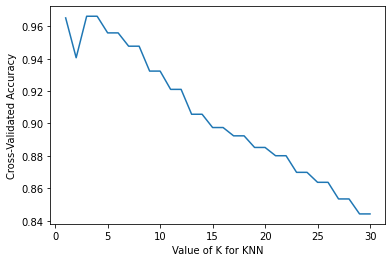

In [ ]:
find_optimal_k(X, Y, 10)

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree

In [ ]:
def apply_decision_tree(X_train, X_test, y_train, y_test, max_depth):
    
    # Create the decision tree
    dt = DecisionTreeClassifier(max_depth=max_depth, random_state=0)
    
    # Fit the decision tree on the train set
    model = dt.fit(X_train, y_train)
    
    # Predict the target variable on the test set
    y_pred = dt.predict(X_test)

    # Calculate the accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print("The confusion_matrix is :\n")
    plot_confusion_matrix(y_test, y_pred)
    print("----------------------------------\n")
    
    # Create a dataframe with the predicted target variable
    data_pred = pd.DataFrame({'y_pred': y_pred, 'y_true':y_test})

    # Calculate feature importances
    importances = model.feature_importances_

    # Sort feature importances in descending order
    indices = np.argsort(importances)[::-1]

    # Rearrange feature names so they match the sorted feature importances
    names = [X_train.columns[i] for i in indices]

    # Create plot
    plt.figure()

    # Create plot title
    plt.title("Feature Importance")

    # Add bars
    plt.bar(range(X_train.shape[1]), importances[indices])

    # Add feature names as x-axis labels
    plt.xticks(range(X_train.shape[1]), names, rotation=90)

    # Show plot
    print("The feature importances chart :\n")
    plt.show()
    print("----------------------------------\n")

    # Print accuracy
    print(f"the accuracy of the model is: {accuracy} \n")
    print("----------------------------------\n")

    
    # Return the dataframe
    return data_pred, accuracy , dt

The confusion_matrix is :



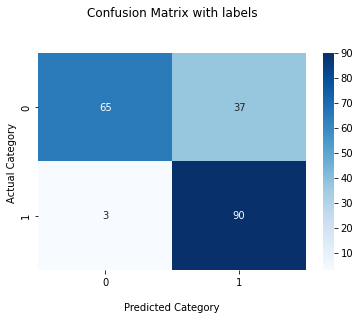

----------------------------------

The feature importances chart :



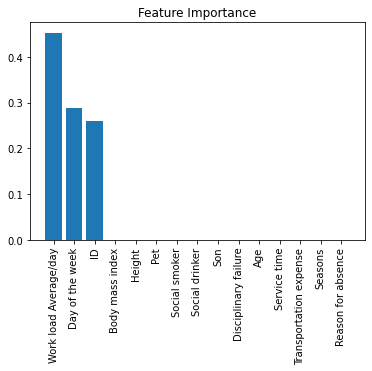

----------------------------------

the accuracy of the model is: 0.7948717948717948 

----------------------------------



In [ ]:
data_pred, accuracy , dt = apply_decision_tree(X_train, X_test, Y_train, Y_test,3)

**Dispalying the Decetion Tree**

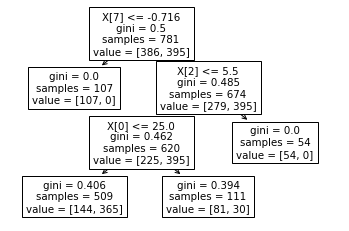

In [ ]:
tree.plot_tree(dt)
plt.show()

In [ ]:
X.axes

[RangeIndex(start=0, stop=976, step=1),
 Index(['ID', 'Reason for absence', 'Day of the week', 'Seasons',
        'Transportation expense', 'Service time', 'Age',
        'Work load Average/day', 'Disciplinary failure', 'Son',
        'Social drinker', 'Social smoker', 'Pet', 'Height', 'Body mass index'],
       dtype='object')]

In [ ]:
from sklearn.model_selection import GridSearchCV
def optimal_depth(X, y):
    """
    Finds the optimal depth for a decision tree.
    
    INPUT: Decision tree classifier, X, y
    OUTPUT: Optimal depth of the tree
    
    """
    # Create a list of depths to choose from
    depths = np.arange(1, 15)

    # Convert to dictionary for grid search, still need to specify cv
    parameters = {'max_depth': depths}

    # Perform grid search using list of depths
    grid = GridSearchCV(DecisionTreeClassifier(), parameters, cv=10)
    grid.fit(X, y)

    # Return the optimal depth
    return grid.best_params_['max_depth'], grid

The optimal maximum depth is: 14


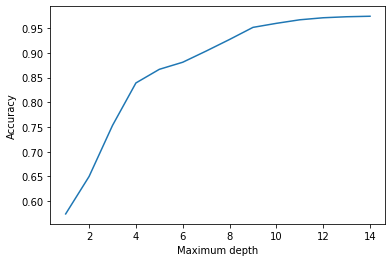

In [ ]:
max_depth, grid = optimal_depth(X, Y)
print("The optimal maximum depth is: " + str(max_depth))

# Plot the results
plt.plot(np.arange(1, 15), grid.cv_results_['mean_test_score'])
plt.xlabel('Maximum depth')
plt.ylabel('Accuracy')
plt.show()

# BaggingClassifier

The confusion_matrix is :



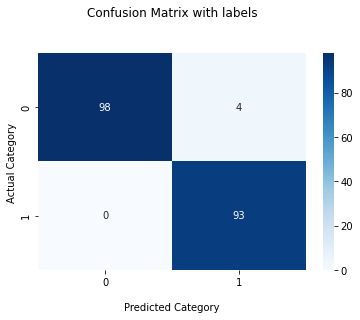

----------------------------------

the accuracy of the model is: 0.9794871794871794 



In [ ]:
from sklearn.ensemble import BaggingClassifier
def fit_bagging(x_train, x_test, y_train, y_test):
    bagging = BaggingClassifier(base_estimator=DecisionTreeClassifier())
    bagging.fit(X_train, Y_train)
    y_pred  = bagging.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print("The confusion_matrix is :\n")
    plot_confusion_matrix(y_test, y_pred)
    print("----------------------------------\n")
    print(f"the accuracy of the model is: {accuracy} \n")
    return bagging

model = fit_bagging(X_train, X_test, Y_train, Y_test)

# Bayes Classifier

**Custom naive bayes model from scratch**

In [ ]:
def train_bayes_classifier(dataset):
    # Get the number of features in the dataset.
    num_features = len(dataset.columns.values.tolist()) - 1

    # Get the number of classes in the dataset.
    num_classes = len(set([row[-1] for row in dataset]))

    # Initialize the class probabilities.
    class_probs = [0 for i in range(num_classes)]

    # Initialize the feature probabilities.
    feature_probs = [[[0 for i in range(num_classes)] for j in range(num_features)] for k in range(2)]

    # Count the number of examples in each class.
    for row in dataset:
        print(row[-1])
        class_probs[row[-1]] += 1

    # Calculate the class probabilities.
    for i in range(num_classes):
        class_probs[i] /= float(len(dataset))

    # Count the number of examples with each feature value for each class.
    for row in dataset:
        for i in range(num_features):
            feature_probs[row[i]][i][row[-1]] += 1

    # Calculate the feature probabilities.
    for i in range(2):
        for j in range(num_features):
            for k in range(num_classes):
                feature_probs[i][j][k] /= float(class_probs[k] * len(dataset))

    return class_probs, feature_probs


def predict_bayes(class_probs, feature_probs, row):
    
    # Initialize the class probabilities.
    probs = [0 for i in range(len(class_probs))]

    # Calculate the class probabilities.
    for i in range(len(class_probs)):
        probs[i] = class_probs[i]
        for j in range(len(row) - 1):
            probs[i] *= feature_probs[row[j]][j][i]

    # Return the class with the highest probability.
    return probs.index(max(probs))

def evaluate_bayes(class_probs, feature_probs, dataset):
    
    # Initialize the predictions.
    predictions = list()

    # Make predictions with the bayes classifier.
    for row in dataset:
        prediction = predict_bayes(class_probs, feature_probs, row)
        predictions.append(prediction)

    # Return the predictions.
    return predictions

**Using scikit-learn library**

The confusion_matrix is :



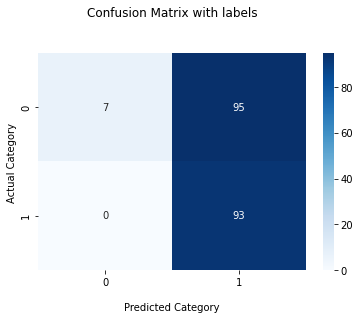

----------------------------------

the accuracy of the model is: 0.7948717948717948 



In [ ]:
from sklearn.naive_bayes import GaussianNB
def train_model(x_train, x_test, y_train, y_test):
    # Create the model
    model = GaussianNB()
    # Train the model
    model.fit(x_train, y_train)
    #Predict using the model
    y_pred  = model.predict(x_test)
    #Evaluate the model
    acuuracy =  accuracy_score(y_test, y_pred)
    print("The confusion_matrix is :\n")
    plot_confusion_matrix(y_test, y_pred)
    print("----------------------------------\n")
    print(f"the accuracy of the model is: {accuracy} \n")
    return model

model = train_model(X_train, X_test, Y_train, Y_test)